# Repaying the Credit

In [1]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#to read data into dataframe from a csv file
data=pd.read_csv(r"DS1_C5_S4_Credit_Data_Hackathonnnn.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [2]:
#check null values present in data
data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [3]:
#to get all information of data,column type.there are 100000 rows × 24 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [4]:
#to find all columns of data
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [5]:
#to find number of unique values in each 
for col in data.columns:
     print(data[col].nunique())

100000
2
2
3
2
2
12
1212
4162
623
7
8
5
6
9871
2
2
2
2
2
18
12
7
5


In [6]:
#using fun_cat function we find Columns that are Categorical data type.
cat=[]
for col in data.columns:
    if data[col].nunique()<=30:
        cat.append(col)

print("Columns that are Categorical data type are:",cat)

#cat list is created,having Categorical data type

Columns that are Categorical data type are: ['TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'MOBILE', 'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED']


In [7]:
# using fun_con function we find Columns that are Numeric data type.
con=[]
con1=data.drop(cat,axis=1) 
con.append(con1.columns)
con
#con list is created,having Numeric data type

[Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
        'DAYS_EMPLOYED'],
       dtype='object')]

In [8]:
#dataframe of cat
data_cat=data.loc[:,cat]

#dataframe of col
data_col=data.drop(cat,axis=1)

In [9]:
#To replace missing values of categorial columns with mode value

def fun_cate1(col):
    if data_cat[col].isnull().sum()>0:
        data_cat[col].fillna(data_cat[col].mode()[0],inplace=True)
    print(f"{col}:Number of category is {data_cat[col].unique()}")
    print(f"{col}:Missing Value is {data_cat[col].isnull().sum()}")
    print("\n")

In [10]:
for col in data_cat.columns:
    fun_cate1(col)

TARGET:Number of category is [1 0]
TARGET:Missing Value is 0


NAME_CONTRACT_TYPE:Number of category is ['Cash loans' 'Revolving loans']
NAME_CONTRACT_TYPE:Missing Value is 0


GENDER:Number of category is ['M' 'F' 'XNA']
GENDER:Missing Value is 0


Car:Number of category is ['N' 'Y']
Car:Missing Value is 0


House:Number of category is ['Y' 'N']
House:Missing Value is 0


CNT_CHILDREN:Number of category is [ 0  1  2  3  4  7  5  6  8  9 11 12]
CNT_CHILDREN:Missing Value is 0


NAME_TYPE_SUITE:Number of category is ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_TYPE_SUITE:Missing Value is 0


NAME_INCOME_TYPE:Number of category is ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_INCOME_TYPE:Missing Value is 0


NAME_EDUCATION_TYPE:Number of category is ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

In [11]:
#To replace missing values of Continues columns with mean value

def fun_num(i):
    if data_col[i].isnull().sum()>0:
        data_col[i].fillna(data_col[i].mean(),inplace=True)
    
    print(f"{i}:Missing Value is {data_col[i].isnull().sum()}")
    

In [12]:
for i in data_col.columns:
    fun_num(i)
    

SK_ID_CURR:Missing Value is 0
AMT_INCOME_TOTAL:Missing Value is 0
AMT_CREDIT:Missing Value is 0
AMT_GOODS_PRICE:Missing Value is 0
DAYS_EMPLOYED:Missing Value is 0


# To perform Univariate analysis categorial columns

TARGET

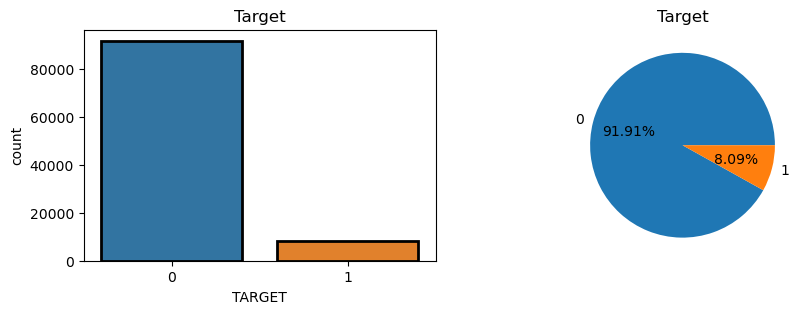

In [13]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['TARGET'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Target')

ind=data['TARGET'].value_counts().index
val=data['TARGET'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
ax[1].set_title('Target')

plt.show()


Observations:<br>
Nearly 90000 or 91%  applicants have target 0

cash loans 

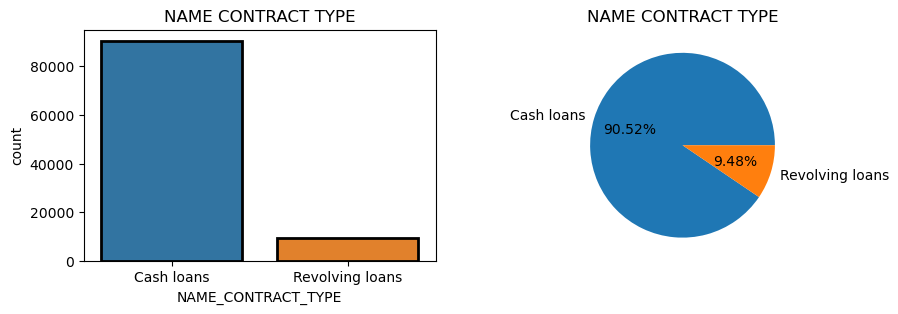

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['NAME_CONTRACT_TYPE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('NAME CONTRACT TYPE')

ind=data['NAME_CONTRACT_TYPE'].value_counts().index
val=data['NAME_CONTRACT_TYPE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
ax[1].set_title('NAME CONTRACT TYPE')
plt.show()



Observations:<br>
 Nearly 90000 or 90.50%  applicants have cash loans

Count of male and female

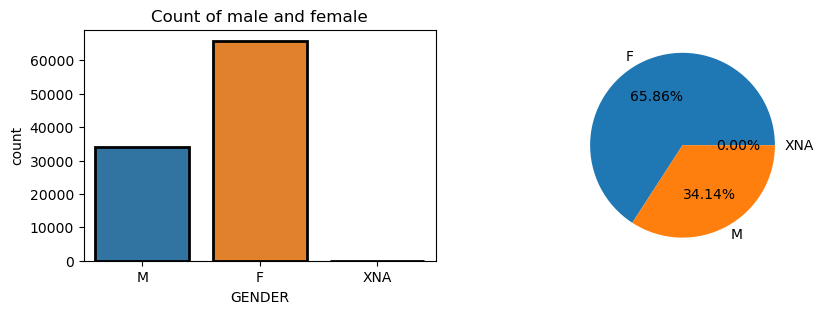

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['GENDER'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Count of male and female')

ind=data['GENDER'].value_counts().index
val=data['GENDER'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
30000+ are male applicants & 60000+ are female applicants

car

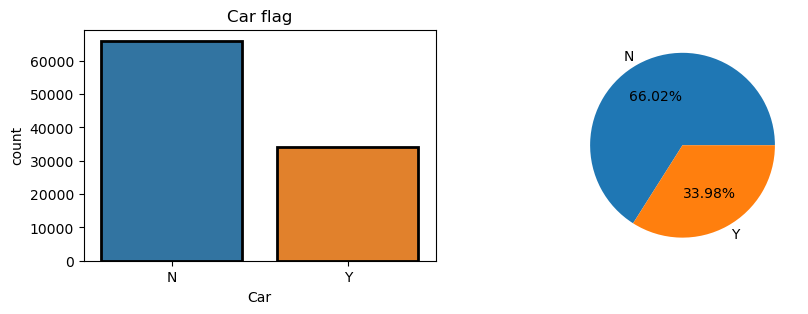

In [16]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['Car'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Car flag')

ind=data['Car'].value_counts().index
val=data['Car'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
60000+ applicants have no cars & 30000 applicants have cars

House

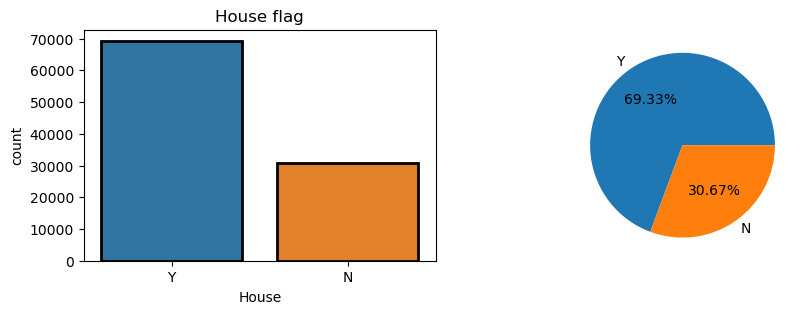

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['House'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('House flag')

ind=data['House'].value_counts().index
val=data['House'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()



Observations:<br>
60000+ applicants have house & nearly 30000 applicants have no houses.

Children count of applicants

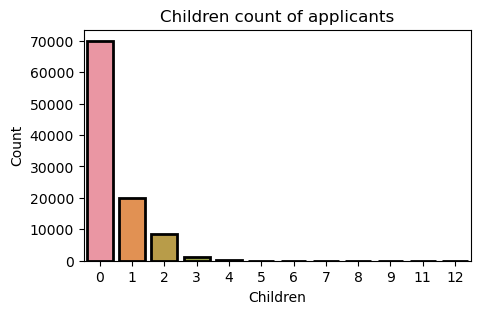

In [18]:
plt.figure(figsize=(5,3))
sb.countplot(x=data['CNT_CHILDREN'],edgecolor='black',linewidth=2)
plt.title('Children count of applicants')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()



Observations:<br>
70000 applicants have 0 children ,20000 applicants have 1 children

NAME_TYPE_SUITE

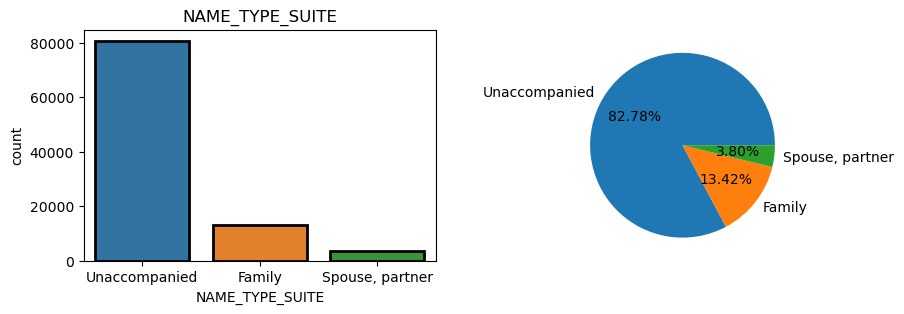

<Figure size 400x300 with 0 Axes>

In [20]:
data1=data[data['NAME_TYPE_SUITE'].isin(['Spouse, partner','Unaccompanied','Family'])]
fig,ax=plt.subplots(1,2,figsize=(10,3))
plt.figure(figsize=(4,3))
sb.countplot(x=data1['NAME_TYPE_SUITE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('NAME_TYPE_SUITE')

ind=data1['NAME_TYPE_SUITE'].value_counts().index
val=data1['NAME_TYPE_SUITE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
 82.78% of applicants have unaccomplished while applying for credit card

Name Income type

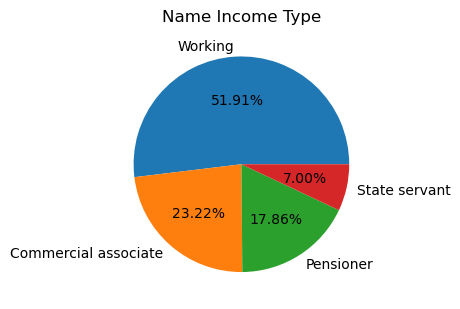

In [21]:
data1=data[data['NAME_INCOME_TYPE'].isin(['State servant','Working','Commercial associate','Pensioner'])]
plt.figure(figsize=(5,3.5))
ind=data1['NAME_INCOME_TYPE'].value_counts().index
val=data1['NAME_INCOME_TYPE'].value_counts().values
plt.pie(x=val,labels=ind,autopct='%.2f%%')
plt.title("Name Income Type")
plt.show()


Observations:<br>
51.90% of applicants are working income type

Education Type

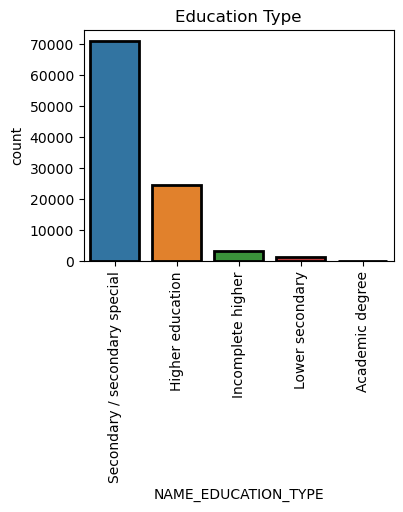

In [50]:

plt.figure(figsize=(4,3))
sb.countplot(x=data1['NAME_EDUCATION_TYPE'],edgecolor='black',linewidth=2)
plt.xticks(rotation=90)
plt.title("Education Type")
plt.show()


Observations:<br>
71.07% or 70000 of applicants have secondary/secondary special education type

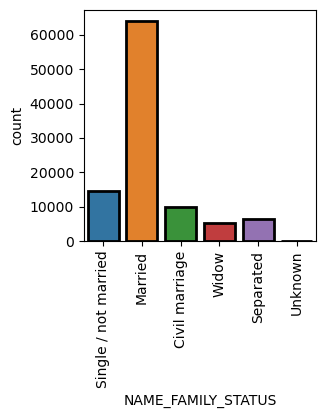

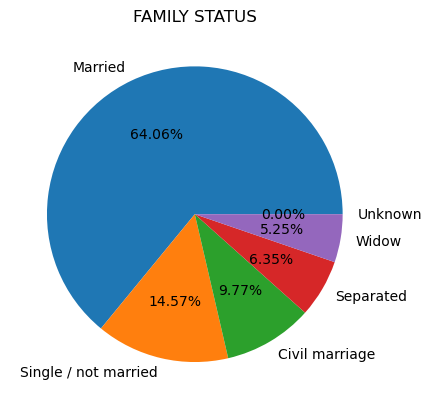

In [70]:
plt.figure(figsize=(4,3))
sb.countplot(x=data['NAME_FAMILY_STATUS'],edgecolor='black',linewidth=2)
plt.xticks(rotation=90)
plt.show()

ind=data['NAME_FAMILY_STATUS'].value_counts().index
val=data['NAME_FAMILY_STATUS'].value_counts().values
plt.pie(x=val,labels=ind,autopct='%.2f%%')
plt.title('FAMILY STATUS')
plt.show()


Observations:<br>
64.06% of applicants have family status Married

Mobile

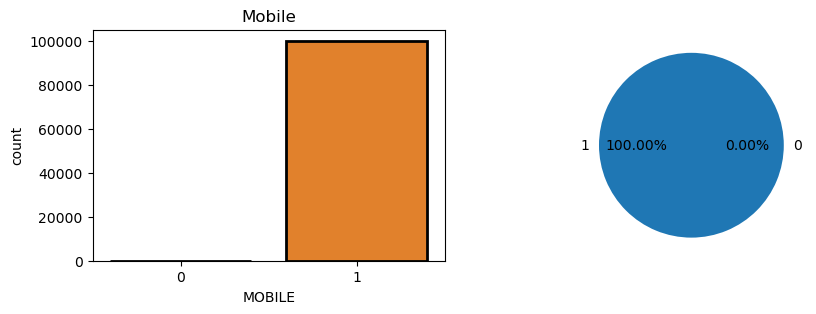

In [39]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['MOBILE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Mobile')

ind=data['MOBILE'].value_counts().index
val=data['MOBILE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
100% of applicants have provided their mobile number

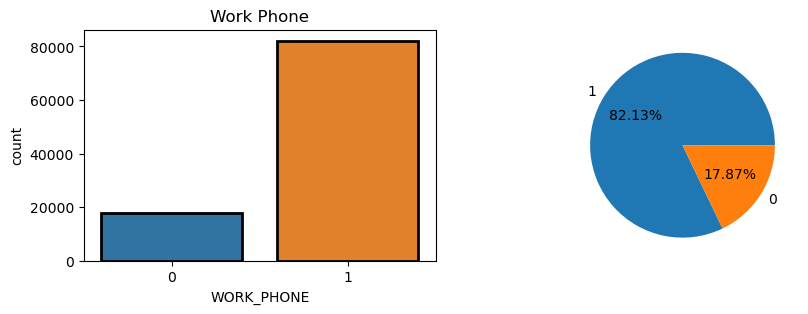

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['WORK_PHONE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Work Phone')

ind=data['WORK_PHONE'].value_counts().index
val=data['WORK_PHONE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')

plt.show()



Observations:<br>
    82.13% of applicants have provided their WORK PHONE number

Home Phone

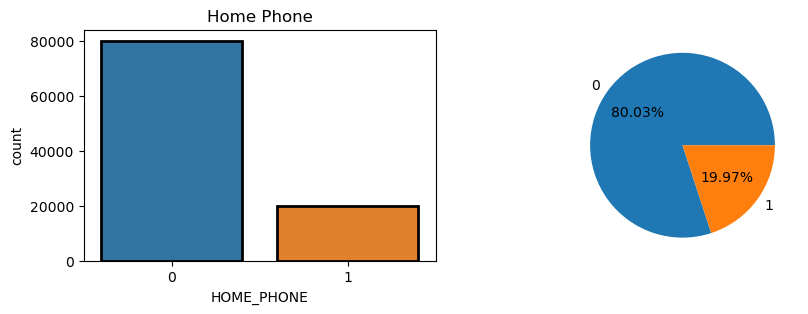

In [36]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['HOME_PHONE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Home Phone')

ind=data['HOME_PHONE'].value_counts().index
val=data['HOME_PHONE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
80.03% of applicants having No HOME PHONE

Mobile Reachable

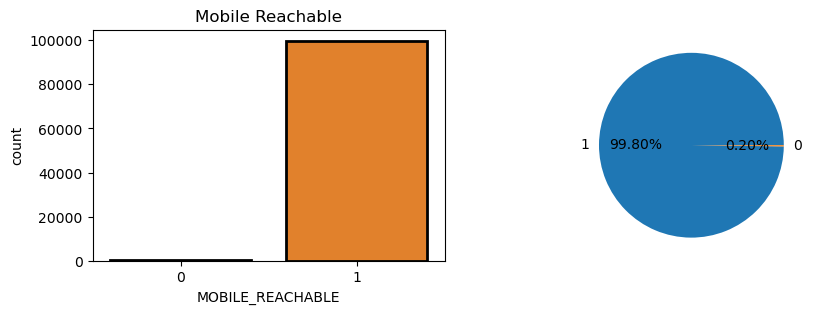

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sb.countplot(x=data['MOBILE_REACHABLE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Mobile Reachable')

ind=data['MOBILE_REACHABLE'].value_counts().index
val=data['MOBILE_REACHABLE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
99.80% of applicants mobile is Reachable 

Flag Email

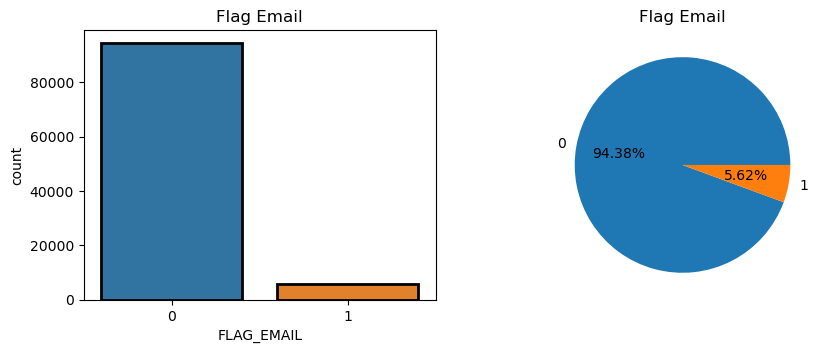

In [71]:
fig,ax=plt.subplots(1,2,figsize=(10,3.5))
sb.countplot(x=data['FLAG_EMAIL'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('Flag Email')

ind=data['FLAG_EMAIL'].value_counts().index
val=data['FLAG_EMAIL'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
ax[1].set_title('Flag Email')

plt.show()


Observations:<br>
94.38% of applicants have provided email

Work Phone

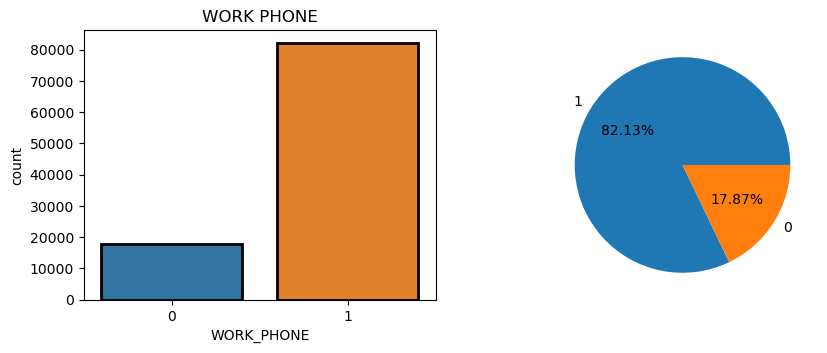

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10,3.5))
sb.countplot(x=data['WORK_PHONE'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('WORK PHONE')

ind=data['WORK_PHONE'].value_counts().index
val=data['WORK_PHONE'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()



Observations:<br>
    82.13% of applicants having WORK PHONE

OCCUPATION TYPE

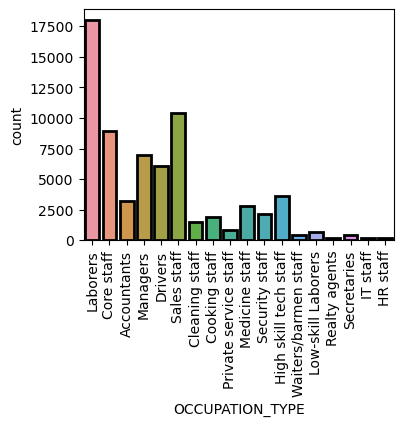

In [30]:
plt.figure(figsize=(4,3))
sb.countplot(x=data['OCCUPATION_TYPE'],edgecolor='black',linewidth=2)
plt.xticks(rotation=90)
plt.show()

Observations:<br>
26.14% or 17500 of applicants having occupation laborers

COUNT OF FAMILY MEMBERS

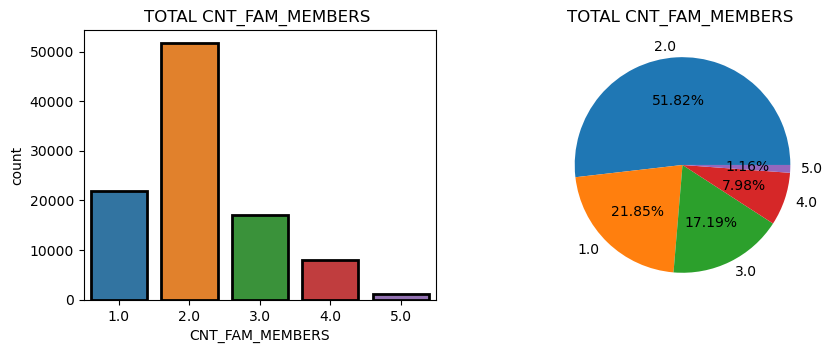

In [72]:
fig,ax=plt.subplots(1,2,figsize=(10,3.5))
data1=data[data['CNT_FAM_MEMBERS']<6.0]
sb.countplot(x=data1['CNT_FAM_MEMBERS'],ax=ax[0],edgecolor='black',linewidth=2)
ax[0].set_title('TOTAL CNT_FAM_MEMBERS ')

ind=data1['CNT_FAM_MEMBERS'].value_counts().index
val=data1['CNT_FAM_MEMBERS'].value_counts().values
ax[1].pie(x=val,labels=ind,autopct='%.2f%%')
ax[1].set_title('TOTAL CNT_FAM_MEMBERS ')
plt.show()


Observations:<br>
51.72% of applicants having family member 2.

APPLICATION_DAY

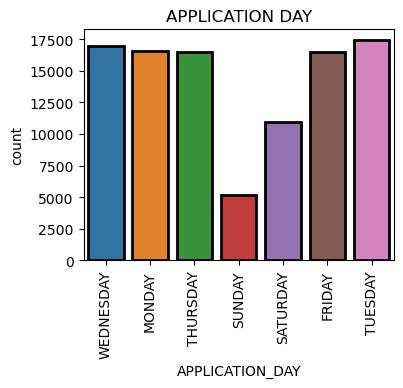

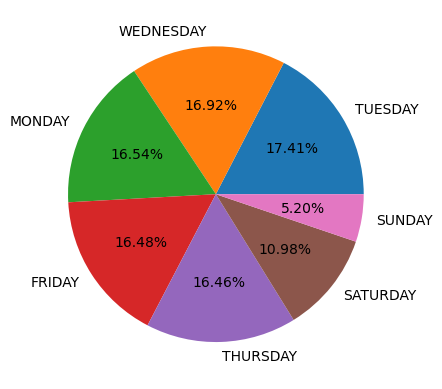

In [17]:
plt.figure(figsize=(4,3))
sb.countplot(x=data['APPLICATION_DAY'],edgecolor='black',linewidth=2)
plt.title("APPLICATION DAY")
plt.xticks(rotation=90)
plt.show()

ind=data['APPLICATION_DAY'].value_counts().index
val=data['APPLICATION_DAY'].value_counts().values
plt.pie(x=val,labels=ind,autopct='%.2f%%')
plt.show()


Observations:<br>
    5% of applicants have applied on sunday,10-17% of application for credit card comes in rest of days.

TOTAL DOCUMENTS SUBMITTED

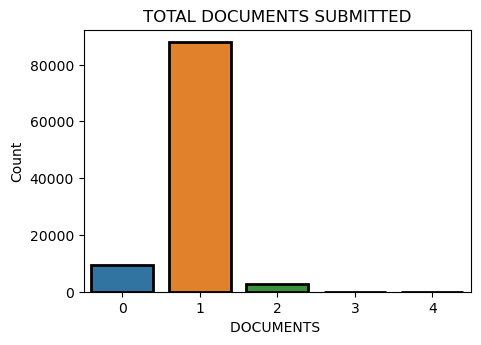

In [22]:
plt.figure(figsize=(5,3.4))
sb.countplot(x=data['TOTAL_DOC_SUBMITTED'],edgecolor='black',linewidth=2)
plt.title('TOTAL DOCUMENTS SUBMITTED')
plt.xlabel('DOCUMENTS ')
plt.ylabel('Count')
plt.show()


Observations:<br>
    87.86% of applicants have submitted 1 documents

# Univariate analysis on continious data

Income of the client

Text(0.5, 1.0, 'Box Plot for AMT_INCOME_TOTAL')

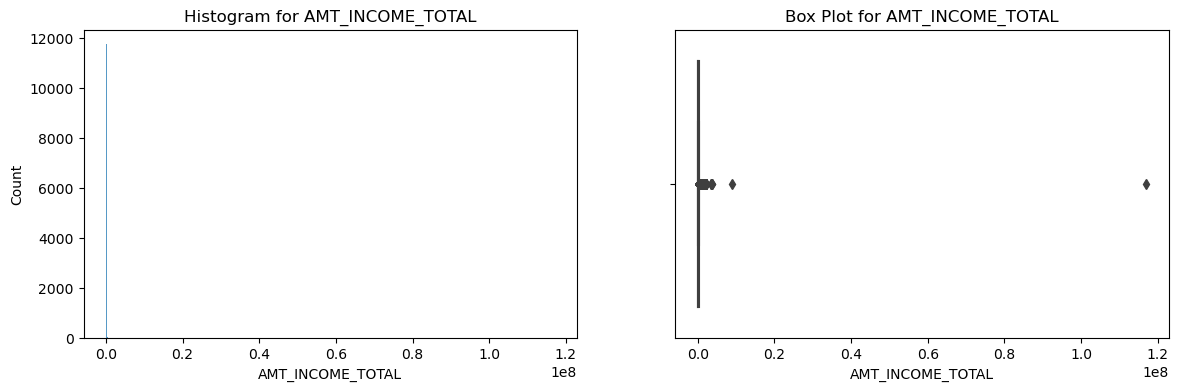

In [81]:
#AMT_INCOME_TOTAL:
fig,ax=plt.subplots(1,2,figsize=(14,4))
data1=data[data['AMT_INCOME_TOTAL']<0.1]
sb.histplot(x=data['AMT_INCOME_TOTAL'],ax=ax[0])
ax[0].set_title('Histogram for AMT_INCOME_TOTAL')

data1=data[data['AMT_INCOME_TOTAL']<0.1]
sb.boxplot(x=data['AMT_INCOME_TOTAL'],ax=ax[1])
ax[1].set_title('Box Plot for AMT_INCOME_TOTAL')



Observations:<br>
    Most of the AMT_INCOME_TOTAL data is between 0 and 0.1

Credit amount of the loan

Text(0.5, 1.0, 'Box Plot for Credit Amount')

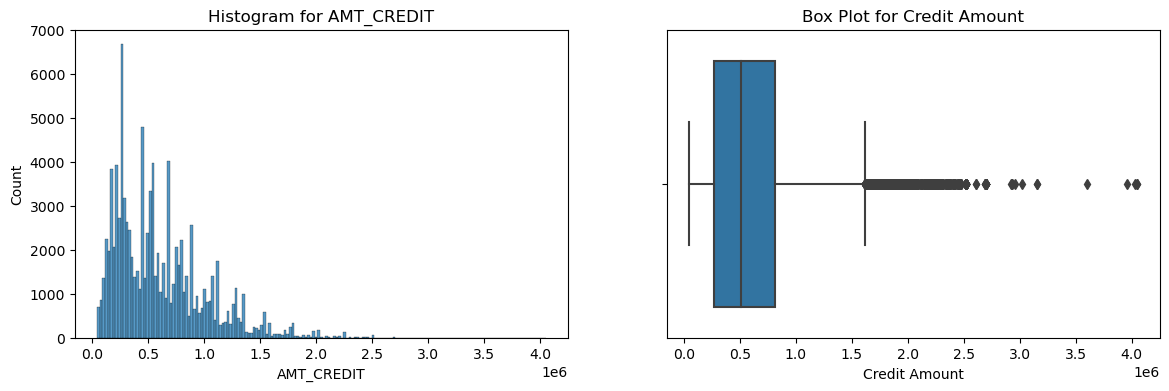

In [40]:
#AMT_CREDIT:
fig,ax=plt.subplots(1,2,figsize=(14,4))

sb.histplot(x=data['AMT_CREDIT'],ax=ax[0])
ax[0].set_title('Histogram for AMT_CREDIT')

sb.boxplot(x=data['AMT_CREDIT'],ax=ax[1])
plt.xlabel('Credit Amount')
ax[1].set_title('Box Plot for Credit Amount')



Observations:<br>
    6000 applicants have AMT_CREDIT 0.3 

AMT_GOODS_PRICE

Text(0.5, 0, 'Price of Goods')

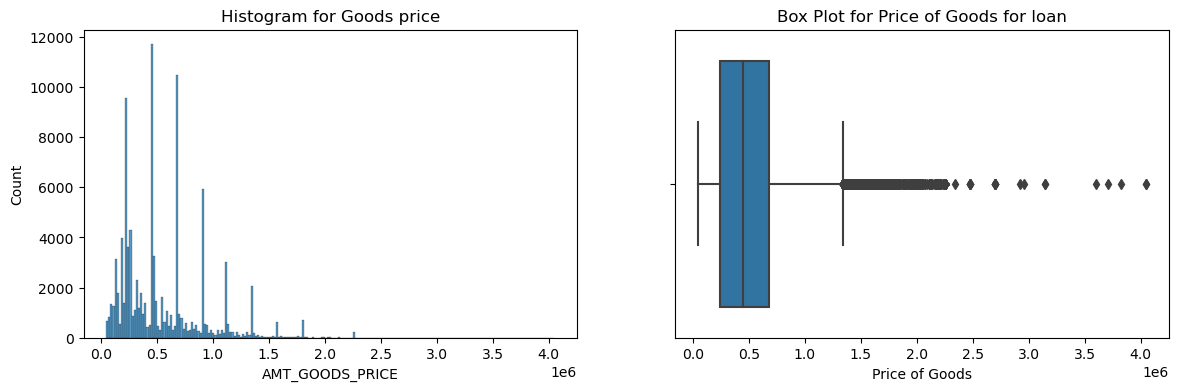

In [41]:
#AMT_GOODS_PRICE:
fig,ax=plt.subplots(1,2,figsize=(14,4))
sb.histplot(x=data['AMT_GOODS_PRICE'],ax=ax[0])
ax[0].set_title('Histogram for Goods price')

sb.boxplot(x=data['AMT_GOODS_PRICE'],ax=ax[1])
ax[1].set_title('Box Plot for Price of Goods for loan')
plt.xlabel('Price of Goods')



Observations:<br>
    AMT_GOODS_PRICE has many outliers<br>
    Many applicants has AMT_GOODS_PRICE  between 0.3 to 0.9

DAYS_EMPLOYED

Text(0.5, 0, 'Days Employed')

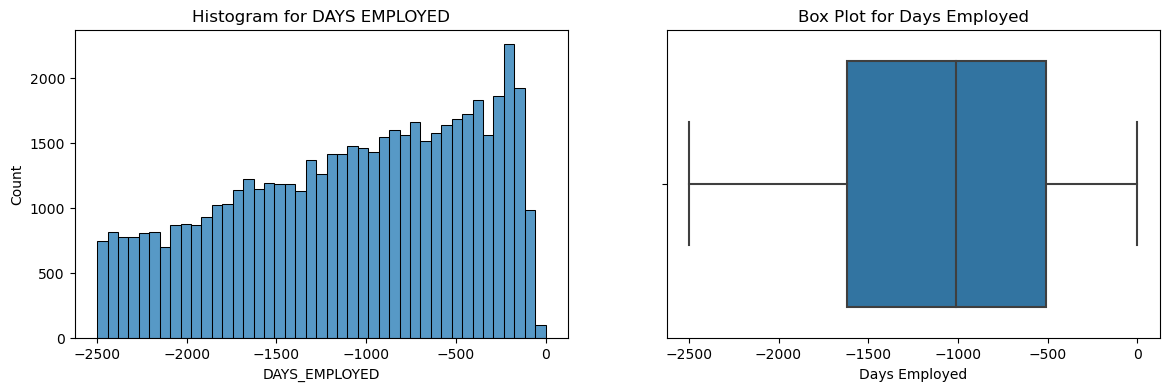

In [42]:
fig,ax=plt.subplots(1,2,figsize=(14,4))
data1=data[(data['DAYS_EMPLOYED']<100000)&(data['DAYS_EMPLOYED']>-2500)]
sb.histplot(x=data1['DAYS_EMPLOYED'],ax=ax[0])
ax[0].set_title('Histogram for DAYS EMPLOYED')

data1=data[(data['DAYS_EMPLOYED']<100000)&(data['DAYS_EMPLOYED']>-2500)]
sb.boxplot(x=data1['DAYS_EMPLOYED'],ax=ax[1])
ax[1].set_title('Box Plot for Days Employed')
plt.xlabel('Days Employed')


Observations:<br>
most of the applicants have DAYS_EMPLOYED between 2500 to 0

# Bivariate analysis

**Which Gender have lower probability to become defaulter?**

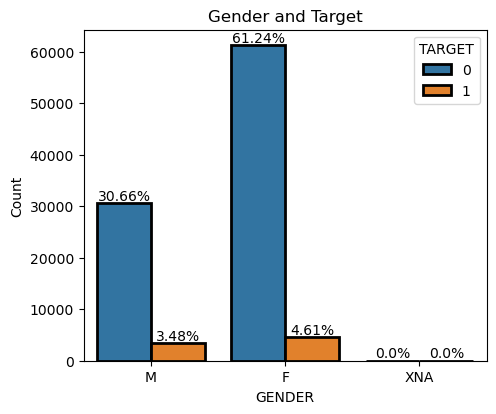

In [23]:
fig, ax = plt.subplots(figsize= (5.2,4.3))
ax = sb.countplot(x=data['GENDER'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Gender and Target") 
plt.ylabel('Count')
plt.show()


Observations:<br>
Female Applicants have lower probability to become defaulter

**How Many Children count have lower probability to become defaulter?**

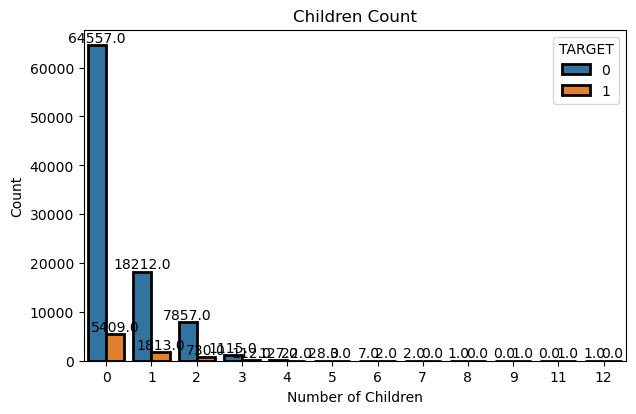

In [24]:
fig, ax = plt.subplots(figsize= (7,4.3))

ax = sb.countplot(x=data['CNT_CHILDREN'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() , 1)}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    

plt.title("Children Count") 
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


Observations:<br>
Applicants having 0 children have lower probability to become defaulter<br>
Applicants having more than 1 children have high probability to become defaulter

<b>Which Kind of loan have lower probability to become defaulter?</b>

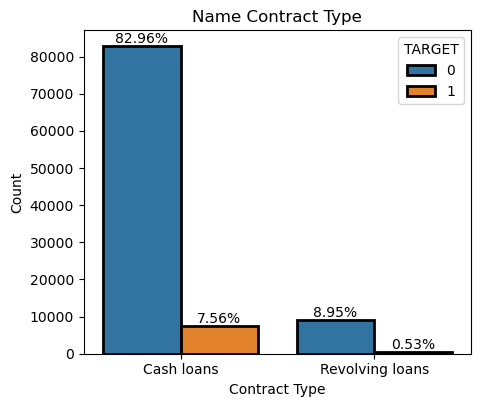

In [44]:
fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data['NAME_CONTRACT_TYPE'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Name Contract Type")
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


Observations:<br>
Applicants having cash loans have lower probability to become defaulter<br>
Applicants having Revolving Loans have high probability to become defaulter

**Does owning House have lower probability to become defaulter?**

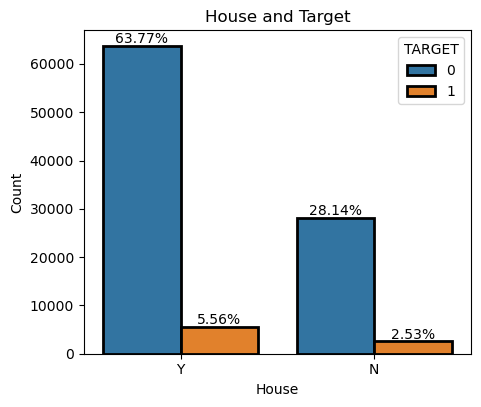

In [43]:
fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data['House'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("House and Target")  
plt.ylabel('Count')
plt.show()


Observations:<br>
Applicants who owns House has lower probability to become defaulter<br>
Applicants who doesnt owns House has probability to become defaulter

**Does applicants accompanied by Whom has lower probability to become defaulter?**

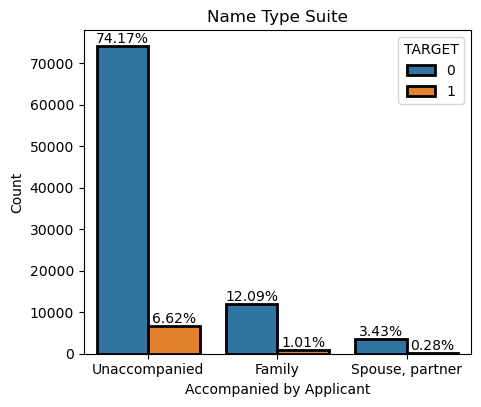

In [42]:
data22=data[data['NAME_TYPE_SUITE'].isin(['Spouse, partner','Unaccompanied','Family'])]

fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data22['NAME_TYPE_SUITE'],hue=data22['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Name Type Suite")
plt.xlabel("Accompanied by Applicant")
plt.ylabel('Count')
plt.show()


Observations:<br>
    
applicants who are unaccompanied has lower probability to become defaulter

**What should be family status of Applicants who have low probability to become defaulter?**

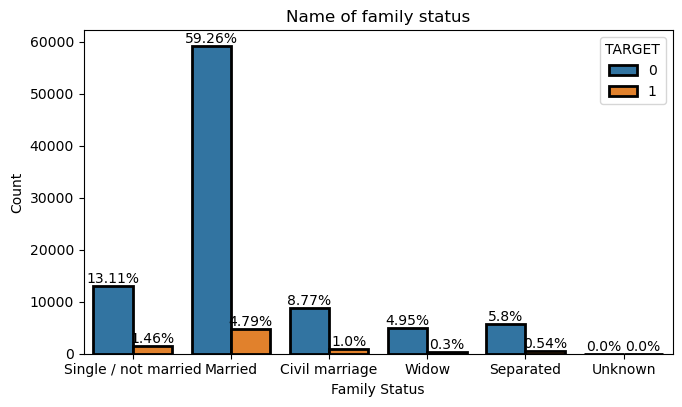

In [40]:
fig, ax = plt.subplots(figsize= (7.6,4.2))
#data4=data[data['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special','Higher education','Incomplete higher'])]
ax = sb.countplot(x=data['NAME_FAMILY_STATUS'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Name of family status")
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()


Observations:<br>    
Applicants whose family status is Married has low probability to become defaulter<br>
Applicants with other family status has probability to become defaulte

**Applicant who has provided MOBILE Number has low probability to become defaulter?**

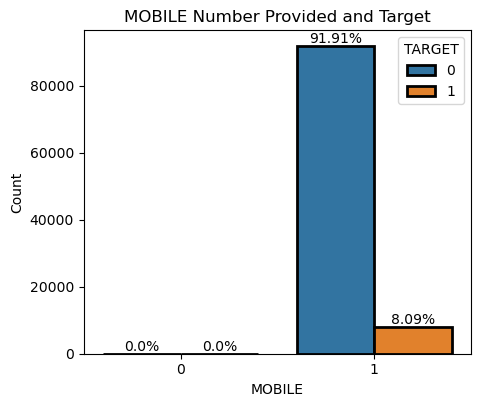

In [38]:
fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data['MOBILE'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("MOBILE Number Provided and Target")
plt.ylabel('Count')
plt.show()


Observations:<br>
Applicants who Provided MOBILE Number has low probability to become defaulter<br>
Applicants who Provided MOBILE Number has High probability to become defaulter

**Applicant who has provided WORK PHONE Number has low probability to become defaulter?**

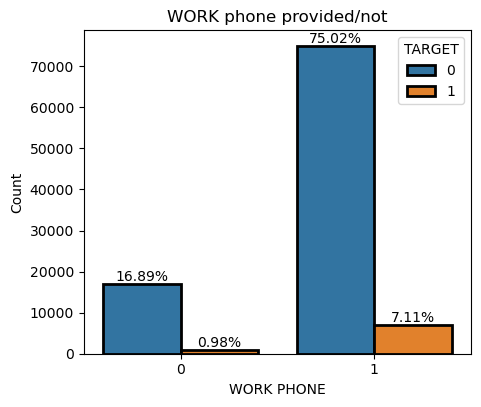

In [37]:
fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data['WORK_PHONE'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("WORK phone provided/not") 
plt.xlabel('WORK PHONE')
plt.ylabel('Count')
plt.show()


Observations:<br>   
Applicants who has work phone has low probability to become defaulter<br>
Applicants who doesnt have work phone has High probability to become defaulter

**Applicant who has provided Home PHONE Number has low probability to become defaulter?**

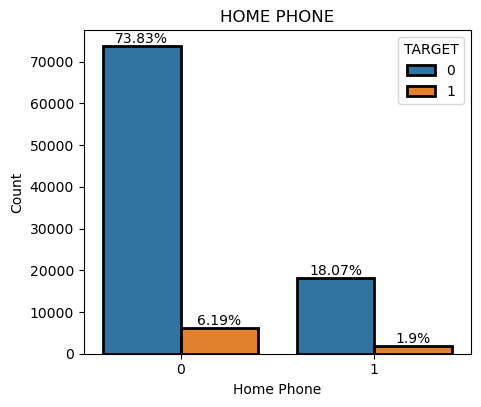

In [35]:
fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data['HOME_PHONE'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("HOME PHONE") 
plt.xlabel('Home Phone')
plt.ylabel('Count')
plt.show()


Observations:<br>
    
Applicants who has HOME PHONE has low probability to become defaulter<br>
Applicants who doesnt have HOME_PHONE has High probability to become defaulter

**Applicant whose MOBILE is REACHABLE has low probability to become defaulter?**

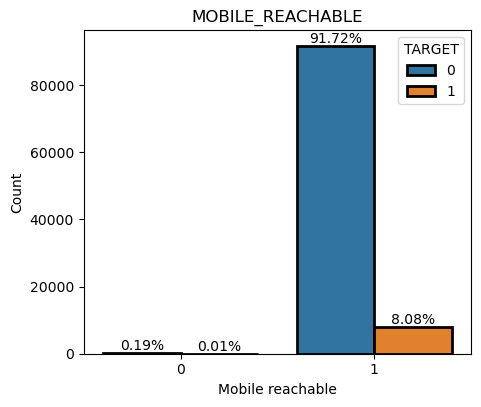

In [36]:
fig, ax = plt.subplots(figsize= (5,4.2))
ax = sb.countplot(x=data['MOBILE_REACHABLE'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("MOBILE_REACHABLE") 
plt.xlabel('Mobile reachable')
plt.ylabel('Count')
plt.show()


Observations:<br>
    
Applicants whose MOBILE is REACHABLE has low probability to become defaulter<br>
Applicants whose MOBILE is not REACHABLE have High probability to become defaulter

**Does Number of Documents submitted Impact to be non defaulter?**

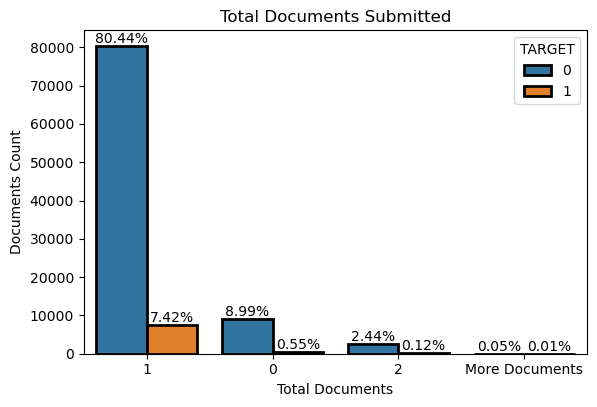

In [31]:

fig, ax = plt.subplots(figsize= (6.5,4.2))
ax = sb.countplot(x=data['TOTAL_DOC_SUBMITTED'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Total Documents Submitted") 
plt.xlabel('Total Documents')
plt.ylabel('Documents Count')
plt.show()


Observations:<br>
    
Applicants whose total document submitted is 1 has low probability to become defaulter<br>
Applicants whose total document submitted is more than 1 have High probability to become defaulter

**What should be OCCUPATION TYPE of non defaulter?**

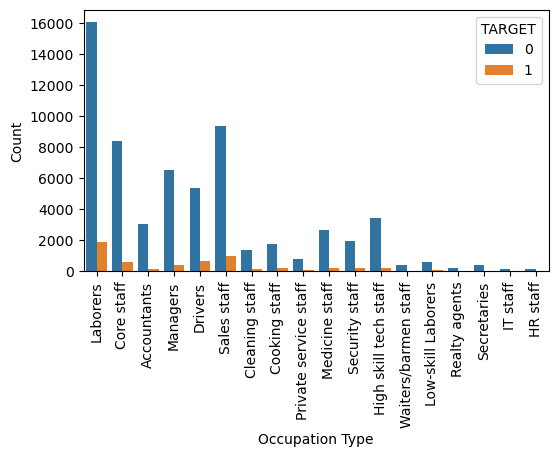

In [49]:
plt.figure(figsize=(6,3.4))
sb.countplot(x=data['OCCUPATION_TYPE'],hue=data['TARGET'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Occupation Type')
plt.show()

#Applicants whose OCCUPATION_TYPE is Laborer , core staff ,accountent,manager,driver,sales staff
# has low probability to become defaulter


Observations:<br>
    
Applicants whose OCCUPATION_TYPE is Laborer , core staff ,accountent,manager,driver,sales staff
has low probability to become defaulter

**What should be the count of Family members who has lower probability to become defaulter?**

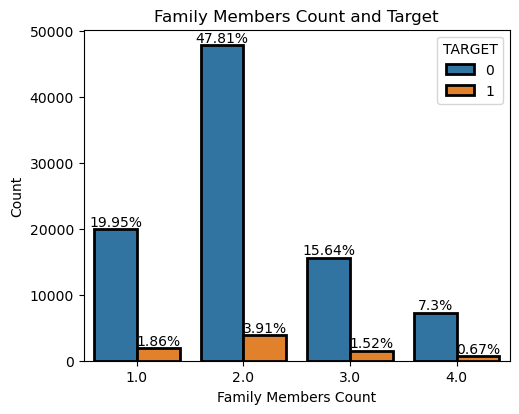

In [33]:
data1=data[data['CNT_FAM_MEMBERS']<5]
fig, ax = plt.subplots(figsize= (5.5,4.3))
ax = sb.countplot(x=data1['CNT_FAM_MEMBERS'],hue=data1['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Family Members Count and Target")   
plt.ylabel('Count')
plt.xlabel('Family Members Count')
plt.show()


Observations:<br>
    
Applicants whose Count of Family Members is 2  has low probability to become defaulter<br>
Loans should not be given to Applicants whose Count of Family Members is more than 3

**Applicants who provide EMAIL id has low probability to become defaulter?**

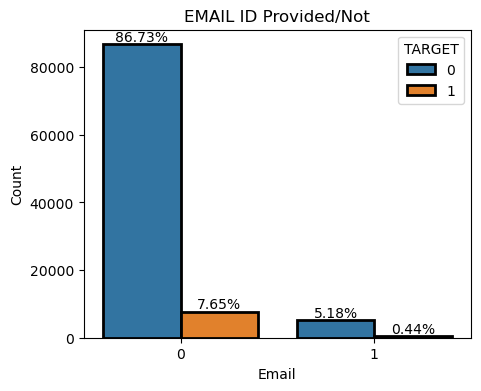

In [34]:
fig, ax = plt.subplots(figsize= (5,4))
ax = sb.countplot(x=data['FLAG_EMAIL'],hue=data['TARGET'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title('EMAIL ID Provided/Not') 
plt.ylabel('Count')
plt.xlabel('Email')
plt.show()


Observations:<br>
Applicants who has EMAIL has low probability to become defaulter<br>
Applicants who doesnt have EMAIL has High probability to become defaulter

# **Multi varient Analysis**

**What should be the Annual Income of male & Female applicants to become non defaulter?**

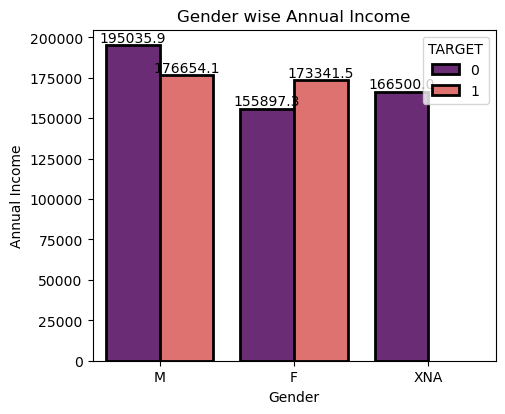

In [25]:
fig, ax = plt.subplots(figsize= (5.2,4.3))
ax = sb.barplot(x=data['GENDER'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],data=data,
                palette='magma',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height() , 1)}"          
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('Gender wise Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()


Observations:<br>
    Applicant whose Average Annual Income of male is 195035 and female is 155897 has low probability<br>
    to become defaulter

**Which education type has high income & low probability to become defaulter?**

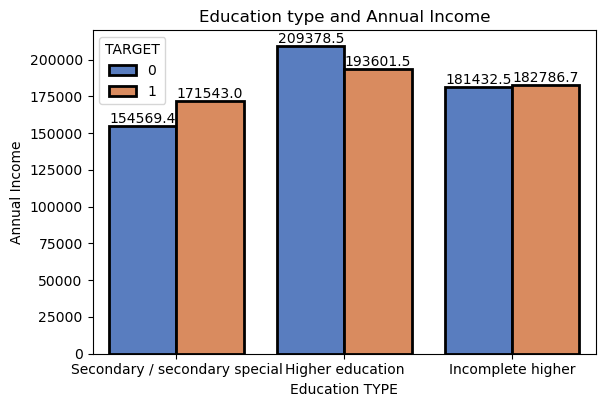

In [47]:
fig, ax = plt.subplots(figsize= (6.5,4.2))
data5=data[data['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special','Higher education','Incomplete higher'])]

ax = sb.barplot(x=data5['NAME_EDUCATION_TYPE'],y=data5['AMT_INCOME_TOTAL'],hue=data['TARGET'],data=data5,
                palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height() , 1)}"          
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('Education type and Annual Income')
plt.xlabel('Education TYPE')
plt.ylabel('Annual Income')
plt.show()


Observations:<br>
Applicant whose education type is Higher education has Average Annual Income of 209378,has 
low probability to become defaulter

**Does owning Car have lower probability to become defaulter and what should be income of such applicant?**

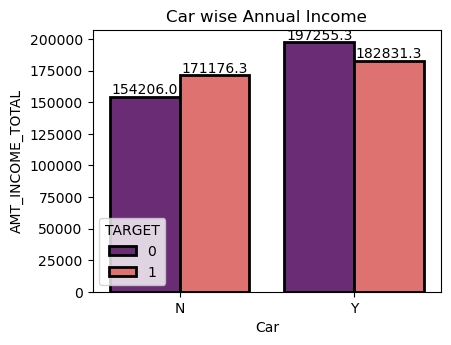

In [24]:
fig, ax = plt.subplots(figsize= (4.5,3.4))
ax = sb.barplot(x=data['Car'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],data=data,
                palette='magma',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height() , 1)}"          
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.xlabel('Car')
plt.title('Annual Income of applicant who own car')
plt.ylabel('Annual Income')
plt.show()


Observations:<br>
    
Applicants who owns car & having average income of 197255 has lower probability to become defaulter<br>
Applicants who doesnt owns car has probability to become defaulter

**What should be occupation type for non defaulters ??**

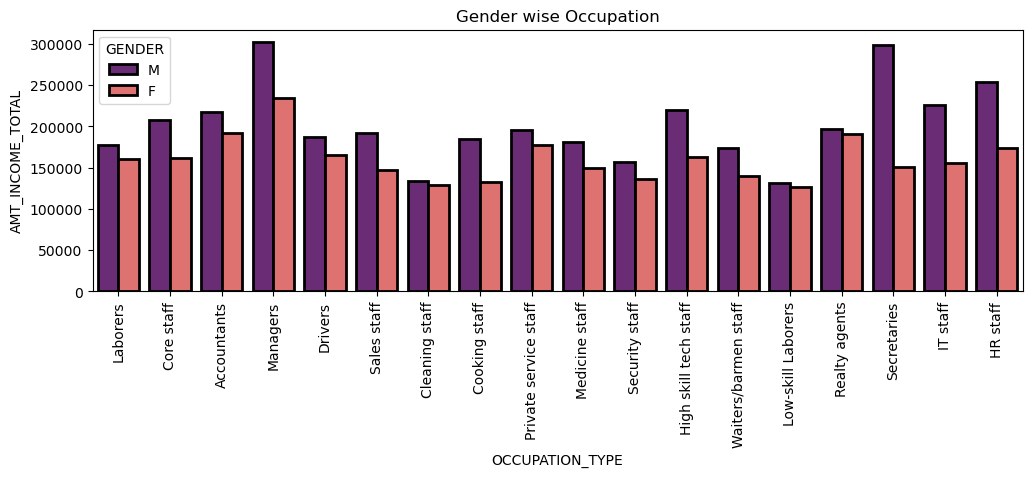

In [37]:
fig, ax = plt.subplots(figsize= (12,3.4))
ax = sb.barplot(x=data['OCCUPATION_TYPE'],y=data['AMT_INCOME_TOTAL'],hue=data['GENDER'],data=data,
                palette='magma',ci=False,edgecolor='black',linewidth=2)

plt.title('Gender wise annual income acc to Occupation')
plt.xticks(rotation=90)
plt.xlabel('Occupation type')
plt.ylabel('Annual Income')
plt.show()

Observation:<br>
    Male applicant whose occupation is Manager,secretaries,HR staff,IT staff<br>
    Female applicant whose occupation is Managers,Realty agents,Accountants has low probabilty to
    become defaulters.
    

**What should be the Income type of applicant acc to gender?**

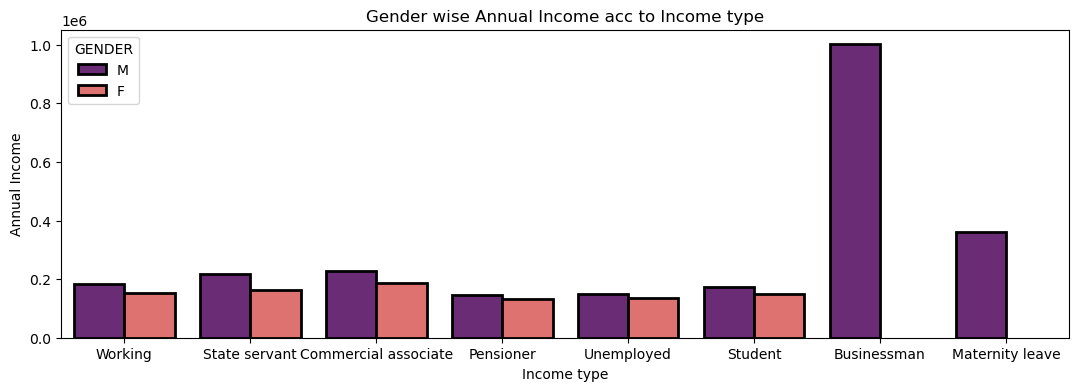

In [46]:
fig, ax = plt.subplots(figsize= (13,4))
ax = sb.barplot(x=data['NAME_INCOME_TYPE'],y=data['AMT_INCOME_TOTAL'],hue=data['GENDER'],data=data,
                palette='magma',ci=False,edgecolor='black',linewidth=2)

plt.title('Gender wise Annual Income acc to Income type')
plt.xlabel('Income type')
plt.ylabel('Annual Income')
plt.show()

Observation:<br>
    Male applicant whose income type is businessman &<br>
    Female applicant whose income type is Working,commercial associate,State servent has low <br>
    probability to become defaulter.

**What should be the education type of applicant acc to gender who has low probility to become defaulter?**

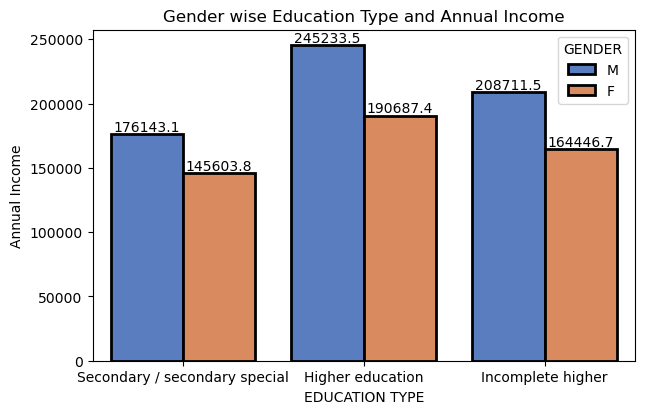

In [45]:
fig, ax = plt.subplots(figsize= (7,4.3))
data7=data[data['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special','Higher education','Incomplete higher'])]

ax = sb.barplot(x=data7['NAME_EDUCATION_TYPE'],y=data7['AMT_INCOME_TOTAL'],hue=data7['GENDER'],data=data7,
                palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height() , 1)}"          
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('Gender wise Education Type and Annual Income')
plt.xlabel('EDUCATION TYPE')
plt.ylabel('Annual Income')
plt.show()

Observation:<br>
    Applicants whose education type is Higher education has low probability to become defaulters.

# Interpretation

1)Nearly 90000 or 91%  applicants have target 0<br>
2)Nearly 90000 or 90.50%  applicants have cash loans<br>
3)30000+ are male applicants & 60000+ are female applicants<br>
4)60000+ applicants have no cars & 30000 applicants have cars<br>
5)60000+ applicants have house & nearly 30000 applicants have no houses.<br>
6)70000 applicants have 0 children ,20000 applicants have 1 children<br>
7)81.12% of applicants have unaccomplished while applying for credit card<br>
8)51.90% of applicants are working income type<br>
9)71.07% of applicants have secondary/secondary special education type<br>
10)100% of applicants have provided mobile number<br>
11)82.13% of applicants have provided WORK PHONE number<br>
12)80.03% of applicants have No PHONE at home<br>
13)99.80% of applicants mobile is Reachable<br> 
14)94.38% of applicants have not provided email<br>
15)26.14% of applicants having occupation laborers.<br>
16)87.86% of applicants have submitted documents<br>
17)5% of applicants have applied on sunday,10-17% of application for credit card comes 
in rest of days.<br>
18)51.72% of applicants having family member 2.<br>
19)most of the applicants have AMT_GOODS_PRICE 0.5<br>
20)most of the applicants have DAYS_EMPLOYED between 2500 to 0




# Applicants who have low probability to be defaulter(Bank should approve loan)

1)Female has low probability to become defaulter & Male Applicant must have  Average Annual Income 195035 and female should have annual income 155897<br>
2)Applicants having 0 children<br>
3)Applicants having cash loans<br>
4)Applicants who owns car & having average income of 197255 has lower probability to become defaulter<br>
5)Applicants who owns house<br>
6)Applicants who are having income type as Working & Commercial associate & Pensioner<br>
7)Applicants who Education type is secondary/secondary special & Higher Education<br>
8)Applicant whose education type is Higher education & having Average Annual Income of 209378 <br>
9)Applicants whose family status is Married<br>
10)Applicants who has provided mobile number,  Email, Work & Home phone numbers.<br>
11)Applicant whose Mobile is Reachable<br>
12)Male applicant whose income type is businessman &
Female applicant whose income type is Working,commercial associate,State servent has low
probability to become defaulter.<br>
13)Male applicant whose occupation is Manager,secretaries,HR staff,IT staff<br>
    Female applicant whose occupation is Managers,Realty agents,Accountants has low probabilty to
    become defaulters.